Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3569 - val_loss: 0.1756
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1653 - val_loss: 0.1422
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1384 - val_loss: 0.1305
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1285 - val_loss: 0.1234
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1216 - val_loss: 0.1183
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1168 - val_loss: 0.1138
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1124 - val_loss: 0.1103
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1094 - val_loss: 0.1084
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1071 - val_loss: 0.1062
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1054 - val_loss: 0.1045
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1037 - val_loss: 0.1033
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/s

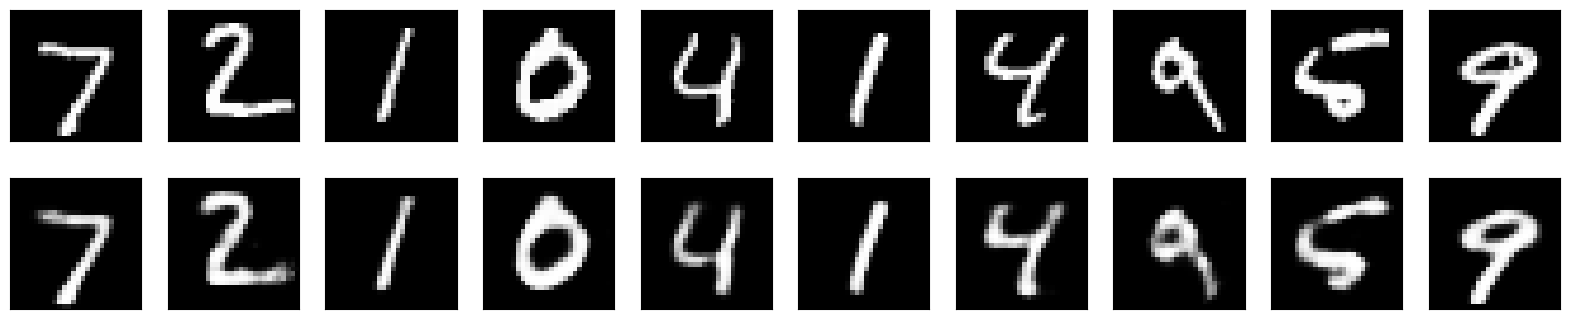

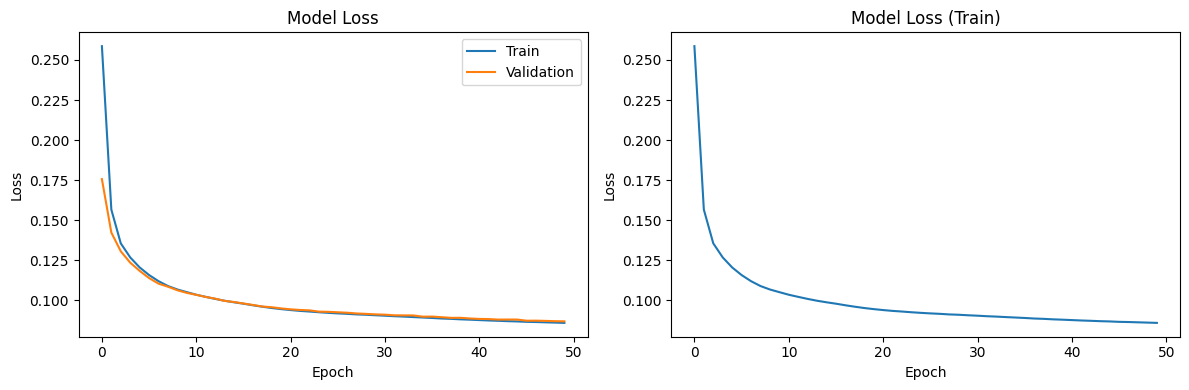

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from sklearn.model_selection import train_test_split

# MNIST 데이터 로드 및 전처리
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# 훈련 데이터를 훈련 세트와 검증 세트로 분할
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42)

# 인코더 구조 정의
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# 디코더 구조 정의
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# 전체 오토인코더 모델 구성
autoencoder = Model(input_img, decoded)

# 인코더 모델 구성
encoder = Model(input_img, encoded)

# 모델 컴파일
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 모델 학습
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_val, x_val))

# 테스트 데이터로 모델 평가
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# 결과 시각화
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # 재구성된 이미지
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 학습 과정 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss (Train)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()